# MNIST DATASET CLASSIFICATION

In [22]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout
from keras.datasets import mnist

In [23]:
(x_train, y_train), (x_test, y_test )= mnist.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
import matplotlib.pyplot as plt

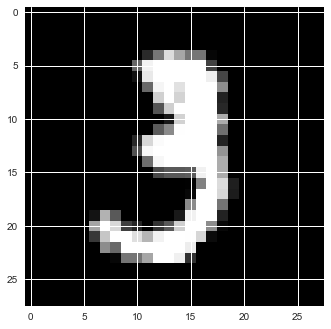

In [26]:
plt.imshow(x_train[10], cmap = "gray");

In [27]:
x_train = x_train / 255
x_test = x_test / 255

In [28]:
#initilizing model
model = Sequential()

#adding layers
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 95, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units  =128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = "softmax"))


#summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 95)                74575     
_________________________________________________________________
dropout_3 (Dropout)          (None, 95)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               12288     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 88,153
Trainable params: 88,153
Non-trainable params: 0
__________________________________________________

In [29]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [30]:
#FITTING THE MODEL
trained_model = model.fit(x_train, y_train, epochs = 5, verbose = 1, batch_size = 57)


Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3432 - accuracy: 0.8977
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1550 - accuracy: 0.9539
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1167 - accuracy: 0.9647
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0958 - accuracy: 0.9708
Epoch 5/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0831 - accuracy: 0.9748


In [31]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'loss')

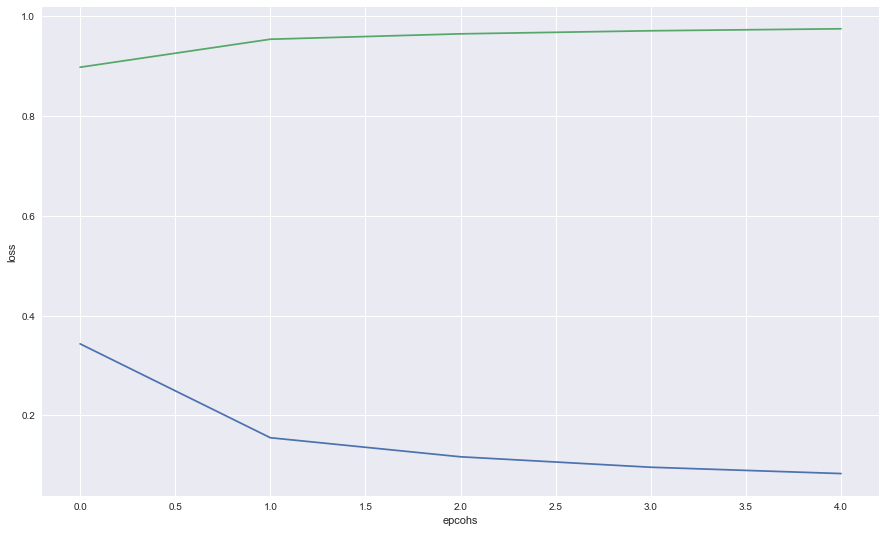

In [32]:
plt.style.use("seaborn")
plt.figure(figsize = (15,9))

plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["accuracy"])
plt.xlabel("epcohs")
plt.ylabel("loss")


In [33]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 0s 35us/step


0.9771999716758728

In [34]:

y_pred = model.predict_classes(x_test)

In [35]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [41]:
import seaborn as  sns

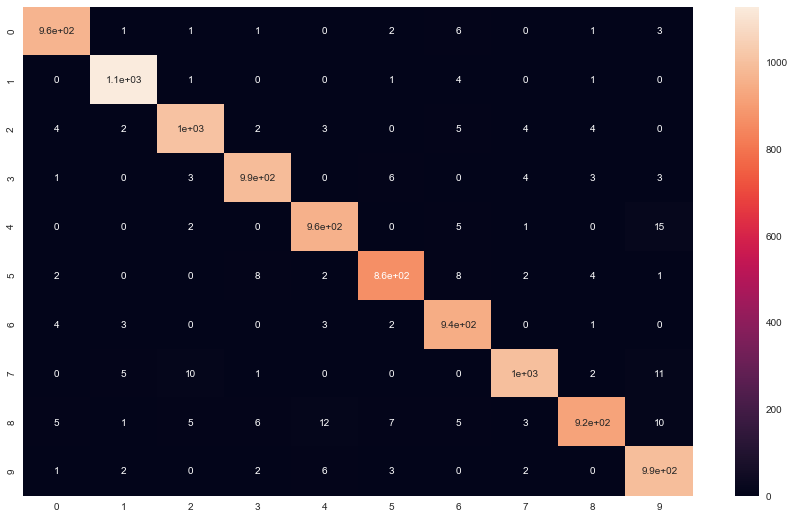

In [42]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



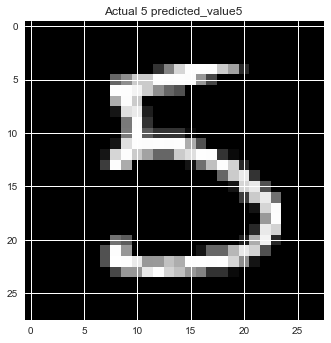

In [46]:

plt.imshow(x_test[15], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[15],y_pred[15]))

plt.show()


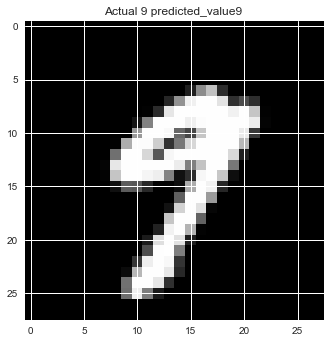

In [47]:

plt.imshow(x_test[20], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[20],y_pred[20]))

plt.show()


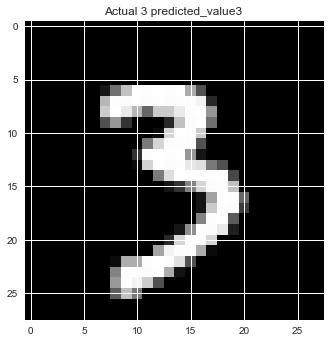

In [48]:

plt.imshow(x_test[30], cmap= "gray")
plt.title("Actual {} predicted_value{} ". format(y_test[30],y_pred[30]))

plt.show()
